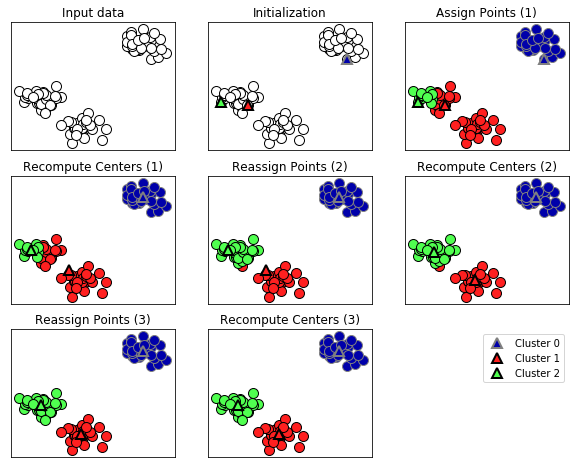

In [2]:
# K-mean Clustering
import mglearn
# Step implement K-mean clustering
mglearn.plots.plot_kmeans_algorithm()

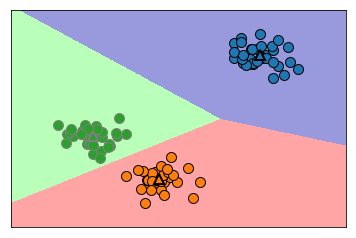

In [3]:
# show boundaries of cluster center
mglearn.plots.plot_kmeans_boundaries()

In [4]:
# Apply k-mean clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=42)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print("Cluster memberships:\n{}".format(kmeans.labels_))
print("kmeans predict:\n{}".format(kmeans.predict(X)))

Cluster memberships:
[1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]
kmeans predict:
[1 2 0 2 1 2 0 2 2 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 2 1 1 1 1 2 2 1 0 0 0
 0 2 2 1 0 2 0 0 2 1 1 1 2 2 2 0 1 1 1 0 0 2 0 1 2 1 2 1 1 2 1 2 2 2 1 1 0
 2 1 2 1 2 2 0 2 0 1 0 0 0 2 0 2 2 2 0 2 0 0 0 2 1 0]


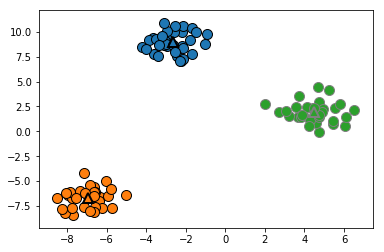

In [5]:
# Visualize
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^',
                         markeredgewidth=2)

Text(0, 0.5, 'Feature 1')

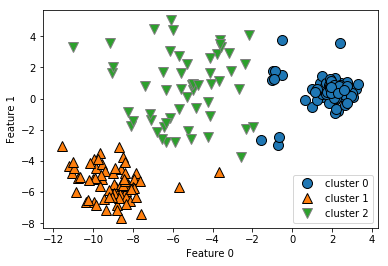

In [6]:
# Failure cases of k-means
# 1st: the cluster have different densities
import matplotlib.pyplot as plt

X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

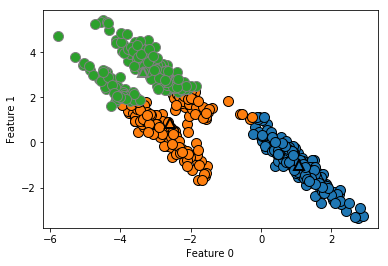

In [7]:
# 2nd: The nonspherical cluster
import numpy as np

X, y = make_blobs(random_state=170, n_samples=600)

rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                         kmeans.cluster_centers_[:, 1],
                         [0, 1, 2],
                         markers='^', 
                         markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

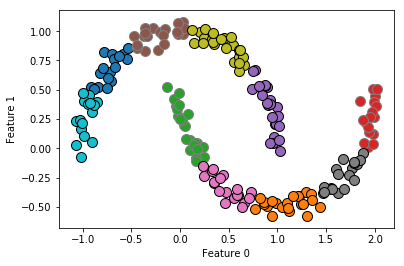

In [8]:
# 3rd: The cluster have more complex shapes

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
# mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
#                          kmeans.cluster_centers_[:, 1],
#                          [0, 1],
#                          markers='^', 
#                          markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [9]:
# people dataset
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255;

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# NMF model
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
# PCA model
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
# KMean model
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

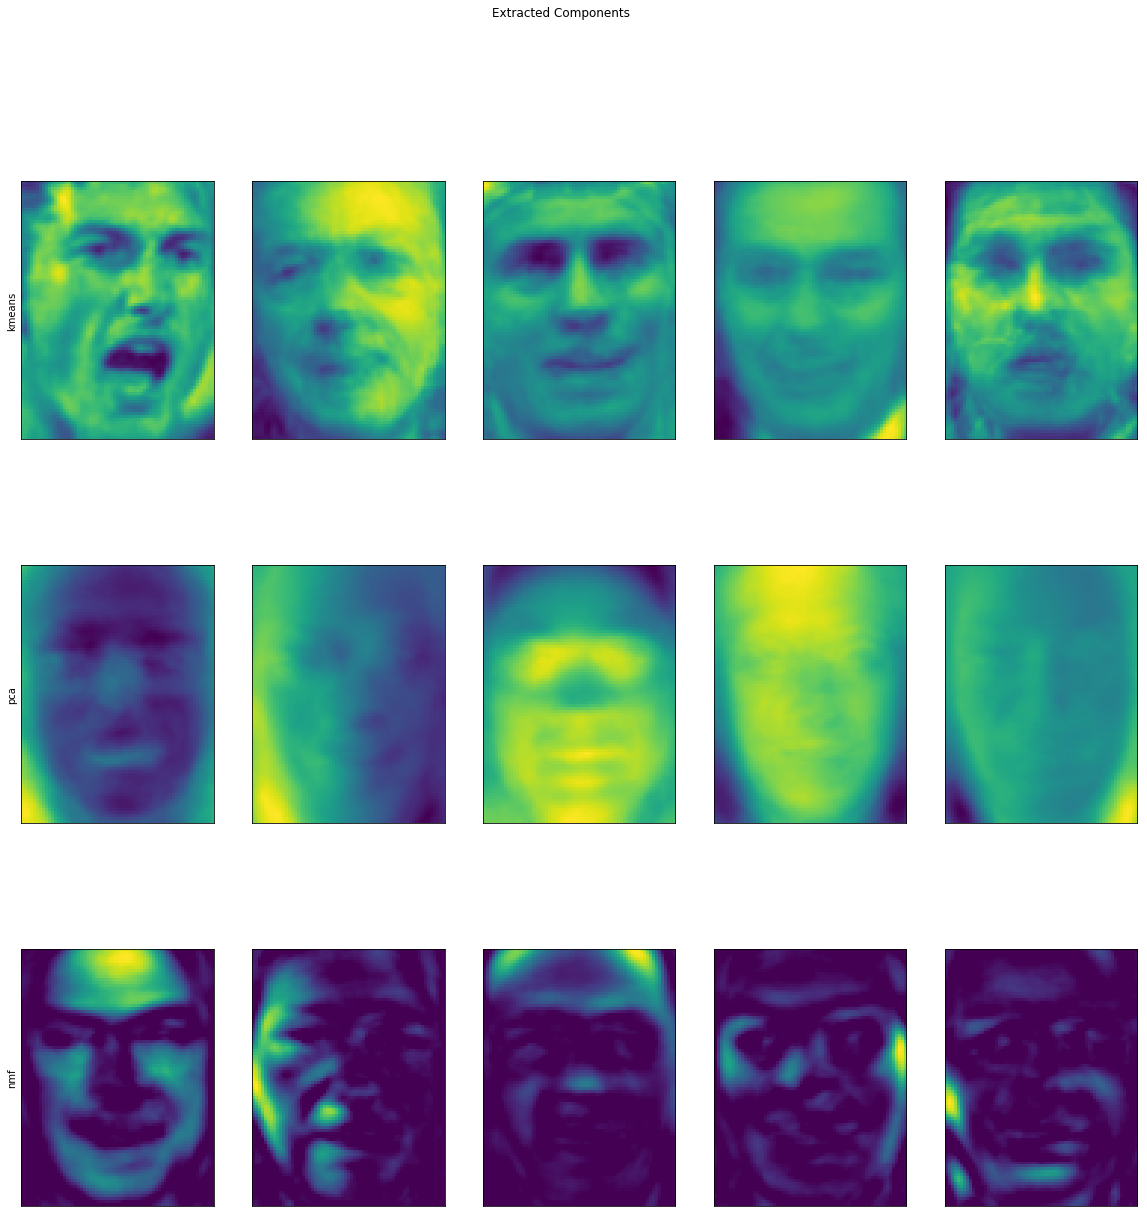

In [11]:
# Show
fig, axes = plt.subplots(3, 5, figsize=(20, 20),
                         subplot_kw={'xticks':(), 'yticks':()})
fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_,
                                              nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

Text(0, 0.5, 'nmf')

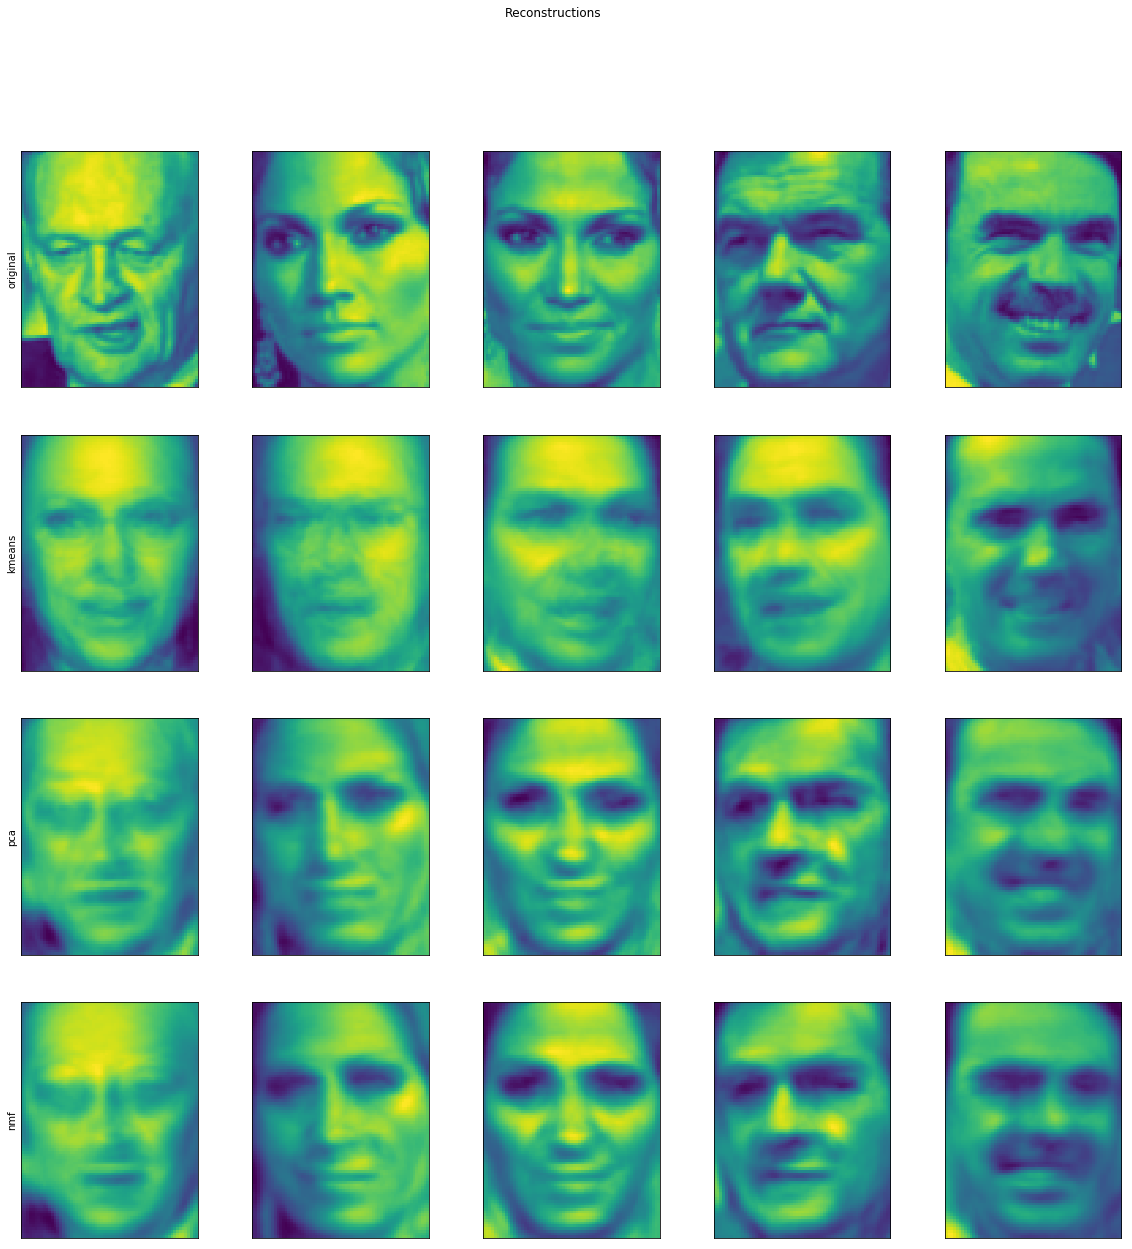

In [14]:
fig, axes = plt.subplots(4, 5, figsize=(20, 20),
                         subplot_kw={'xticks':(), 'yticks':()})
fig.suptitle("Reconstructions")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans,
                                                     X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Text(0, 0.5, 'Feature 1')

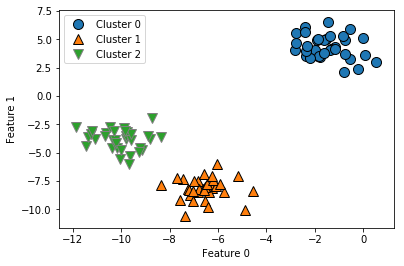

In [15]:
# Agglomerative model

from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

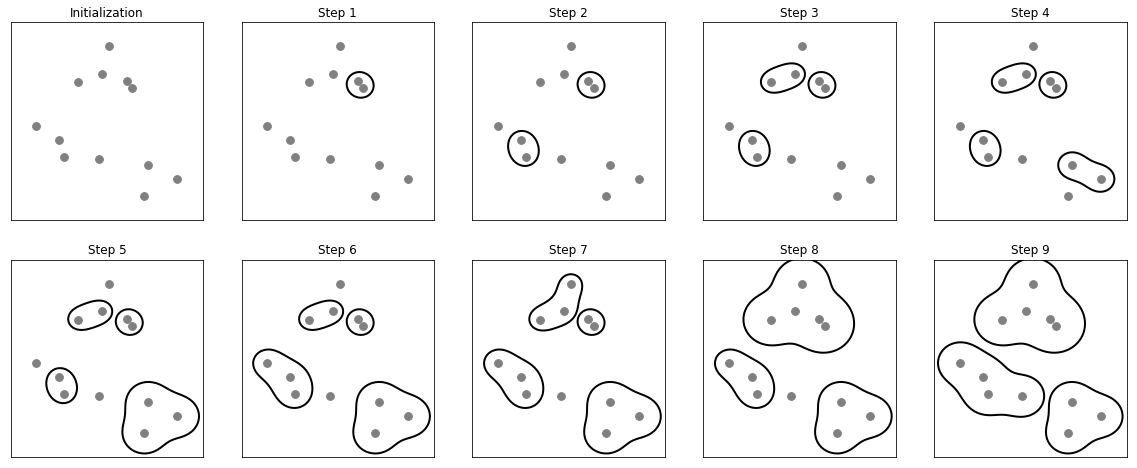

In [19]:
# Simulating agglomerative

mglearn.plots.plot_agglomerative_algorithm()

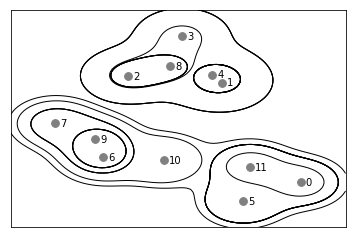

In [22]:
# Show Hierarchical clustering and dendrograms

mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

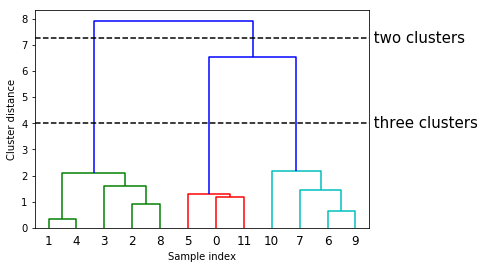

In [35]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size':15})

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [36]:
# DBSCAN

from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()

clusters = dbscan.fit_predict(X)
print("Cluster membership:\n{}".format(clusters))

Cluster membership:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


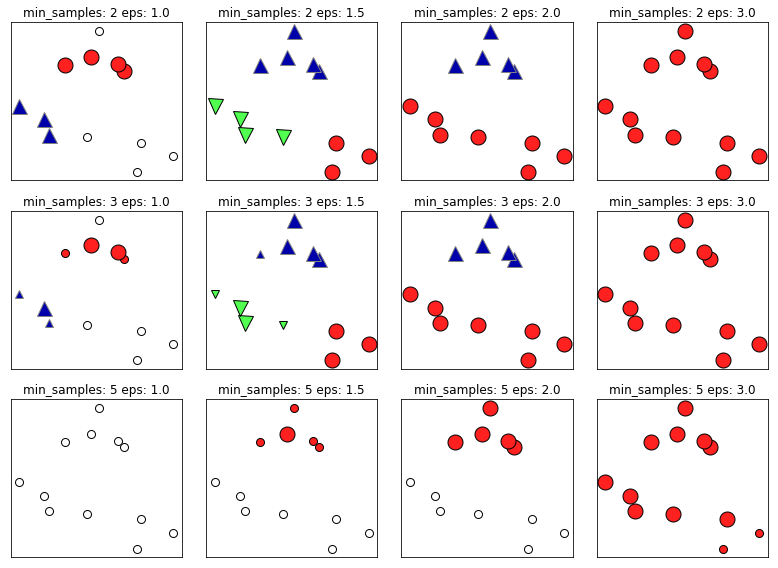

In [37]:
mglearn.plots.plot_dbscan()

Shape of clusters: (200,)


Text(0, 0.5, 'Feature 1')

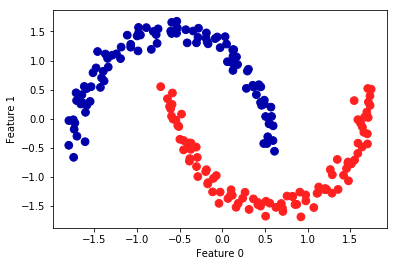

In [55]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN(eps=0.5)
clusters = dbscan.fit_predict(X_scaled)
print("Shape of clusters: {}".format(clusters.shape))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")